KNN è un algoritmo di apprendimento supervisionato che può essere utilizzato per risolvere problemi di classificazione e regressione. L'algoritmo KNN è un algoritmo di apprendimento basato sull'istanza. L'apprendimento basato sull'istanza è un tipo di apprendimento non parametrico che non fa alcuna assunzione sui dati di input. Ciò significa che questo algoritmo non costruisce un modello interno, ma memorizza semplicemente le istanze dei dati di addestramento. La classificazione viene calcolata dal voto di maggioranza dei vicini, con l'oggetto assegnato alla classe più comune tra i suoi k vicini più vicini (k è un numero intero positivo, tipicamente piccolo). Se k = 1, l'oggetto viene semplicemente assegnato alla classe di quel singolo vicino più prossimo.

 - https://it.wikipedia.org/wiki/K-nearest_neighbors

Il k-nearest neighbors (traducibile come primi k-vicini), abbreviato in K-NN, è un algoritmo utilizzato nel riconoscimento di pattern per la classificazione di oggetti basandosi sulle caratteristiche degli oggetti vicini a quello considerato. In entrambi i casi, l'input è costituito dai k esempi di addestramento più vicini nello spazio delle funzionalità. L'output dipende dall'utilizzo di k-NN per la classificazione o la regressione:

Nella classificazione k-NN, l'output è un'appartenenza a una classe. Un oggetto è classificato da un voto di pluralità dei suoi vicini, con l'oggetto assegnato alla classe più comune tra i suoi k vicini più vicini (k è un numero intero positivo, tipicamente piccolo). Se k = 1, l'oggetto viene semplicemente assegnato alla classe di quel singolo vicino più prossimo.

Nella regressione k-NN, l'output è il valore della proprietà per l'oggetto. Questo valore è la media dei valori di k vicini più vicini. 

Il parametro k

Un oggetto è classificato in base alla maggioranza dei voti dei suoi k vicini. k è un intero positivo tipicamente non molto grande. Se k=1 allora l'oggetto viene assegnato alla classe del suo vicino. In un contesto binario in cui sono presenti esclusivamente due classi è opportuno scegliere k dispari per evitare di ritrovarsi in situazioni di parità.

Questo metodo può essere utilizzato per la tecnica di regressione assegnando all'oggetto la media dei valori dei k oggetti suoi vicini.

Considerando solo i voti dei k oggetti vicini c'è l'inconveniente dovuto alla predominanza delle classi con più oggetti. In questo caso può risultare utile pesare i contributi dei vicini in modo da dare, nel calcolo della media, maggior importanza in base alla distanza dall'oggetto considerato.

Scelta del parametro k

La scelta di k dipende dalle caratteristiche dei dati. Generalmente all'aumentare di k si riduce il rumore che compromette la classificazione, ma il criterio di scelta per la classe diventa più labile. La scelta può esser presa attraverso tecniche di euristica, come ad esempio la convalida incrociata. 

In [10]:
# importiamo le librerie
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# importiamo il dataset
dataset = pd.read_csv('bank-full.csv', sep = ';')

# selezioniamo le colonne da utilizzare
X = dataset.iloc[:, [0, 5]].values      # age, balance
y = dataset.iloc[:, 16].values          # y 

# verifichiamo la correttezza dei dati
print(X.shape)
print(y.shape)



(45211, 2)
(45211,)


<AxesSubplot:xlabel='age', ylabel='balance'>

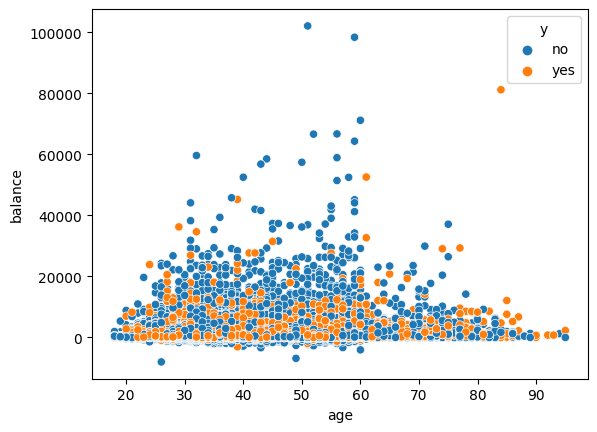

In [11]:
sns.scatterplot(x = 'age', y = 'balance', hue = 'y', data = dataset)

In [12]:
# dividiamo il dataset in training set e test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

Normalizzazione e suddivisione dei dati

Durante l'addestramento di qualsiasi modello di machine learning, è importante suddividere i dati in dati di addestramento e dati di test. I dati di addestramento vengono utilizzati per adattare il modello. L'algoritmo utilizza i dati di addestramento per apprendere la relazione tra le caratteristiche e l'obiettivo. Cerca di trovare uno schema nei dati di addestramento che può essere utilizzato per fare previsioni su dati nuovi e invisibili. I dati di test vengono utilizzati per valutare le prestazioni del modello. Il modello viene testato sui dati di test utilizzandolo per fare previsioni e confrontare queste previsioni con i valori target effettivi.

Quando si addestra un classificatore kNN, è essenziale normalizzare le caratteristiche. Questo perché kNN misura la distanza tra i punti. L'impostazione predefinita consiste nell'utilizzare la distanza euclidea, che è la radice quadrata della somma delle differenze al quadrato tra due punti. Nel nostro caso, le variabili hanno ordini di grandezza diverse. Se non lo normalizzassimo, il nostro calcolo sarebbe pesantemente pesato da quella con i numeri che sono più grandi.

Dovremmo normalizzare i dati dopo averli suddivisi in set di addestramento e test. Questo serve a prevenire la "fuga di dati" poiché la normalizzazione darebbe al modello informazioni aggiuntive sul set di test se normalizzassimo tutti i dati contemporaneamente.

Il codice seguente suddivide i dati in suddivisioni train/test, quindi li normalizza utilizzando lo scaler standard di scikit-learn. Per prima cosa chiamiamo .fit_transform() sui dati di addestramento, che adatta il nostro scaler alla media e alla deviazione standard dei dati di addestramento. Possiamo quindi applicare questo ai dati di test chiamando .transform(), che utilizza i valori appresi in precedenza.

In [13]:
# normalizziamo i dati
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Adattamento e valutazione del modello

Ora siamo pronti per addestrare il modello. Per questo, useremo un valore fisso di 3 per k, ma dovremo ottimizzarlo in seguito. Per prima cosa creiamo un'istanza del modello kNN, quindi la adattiamo ai nostri dati di addestramento. Passiamo sia le funzionalità che la variabile target, in modo che il modello possa apprendere.

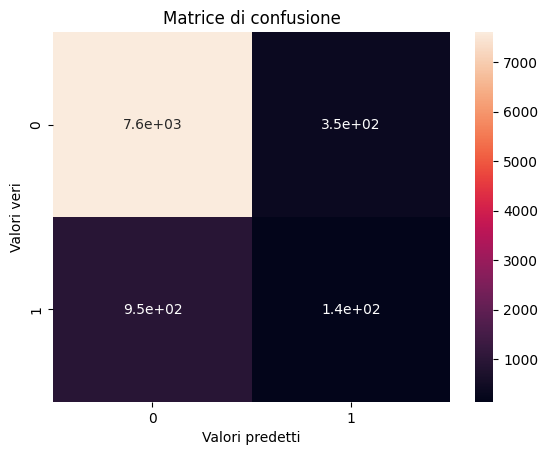

Accuracy:  0.8564635629768882
Precision:  0.8890318054256314
Recall:  0.9561116700201208


In [21]:
# creiamo il modello
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

# prediciamo i valori
y_pred = classifier.predict(X_test)

# valutiamo il modello
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# creiamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title('Matrice di confusione')
plt.xlabel('Valori predetti')
plt.ylabel('Valori veri')
plt.show()


# valutiamo l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# valutiamo la precisione
precision = precision_score(y_test, y_pred, pos_label='no')
print('Precision: ', precision)

# valutiamo il recall
recall = recall_score(y_test, y_pred, pos_label='no')
print('Recall: ', recall)

Utilizzo della convalida incrociata per ottenere il miglior valore di k

Sfortunatamente, non esiste un modo magico per trovare il miglior valore per k. Dobbiamo scorrere molti valori diversi, quindi usare il nostro miglior giudizio.

Nel codice seguente, selezioniamo un intervallo di valori per k e creiamo un elenco vuoto per memorizzare i nostri risultati. Utilizziamo la convalida incrociata per trovare i punteggi di accuratezza, il che significa che non abbiamo bisogno di creare una suddivisione di addestramento e test, ma dobbiamo ridimensionare i nostri dati. Quindi eseguiamo il loop sui valori e aggiungiamo i punteggi alla nostra lista.

Per implementare la convalida incrociata, utilizziamo cross_val_score di scikit-learn. Passiamo un'istanza del modello kNN, insieme ai nostri dati e a una serie di divisioni da effettuare. Nel codice seguente, utilizziamo cinque divisioni, il che significa che il modello suddivide i dati in cinque gruppi di uguali dimensioni e utilizza 4 per addestrare e 1 per testare il risultato. Attraverserà ogni gruppo e fornirà un punteggio di accuratezza, di cui facciamo una media per trovare il modello migliore.

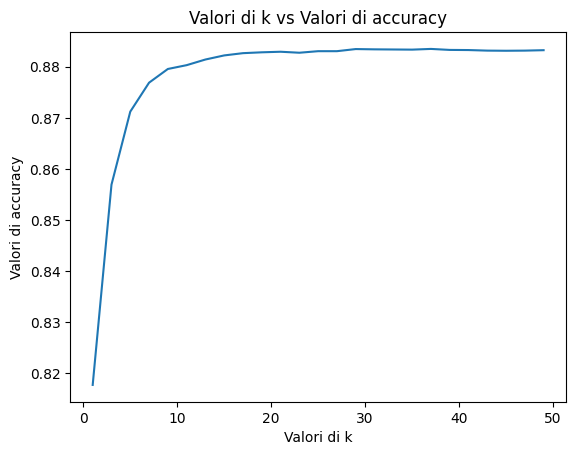

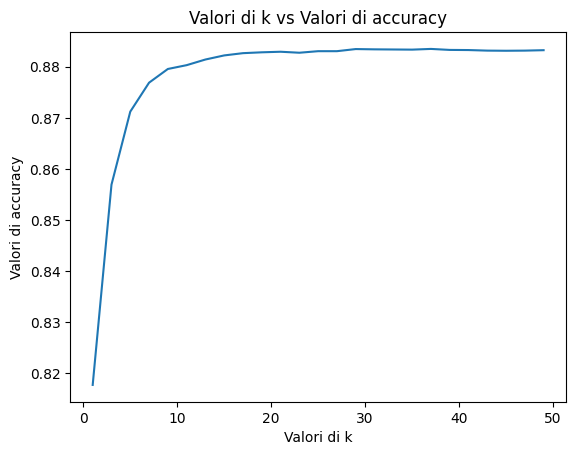

In [16]:
# ricerchiamo il migliore valore di k con la cross validation
from sklearn.model_selection import cross_val_score

# creiamo una lista di valori di k
k_list = list(range(1, 50, 2))

# creiamo una lista per i valori di accuracy
accuracy_list = []

# creiamo un ciclo per trovare il valore di k migliore
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'accuracy')
    accuracy_list.append(score.mean())

# grafichiamo i valori di accuracy con matplotlib
plt.plot(k_list, accuracy_list)
#sns.lineplot(x = k_list, y = accuracy_list)
plt.xlabel('Valori di k')
plt.ylabel('Valori di accuracy')
plt.title('Valori di k vs Valori di accuracy')
plt.show()

In [17]:
# cerchiamo il valore di k migliore
best_index = np.argmax(accuracy_list)
best_k = k_list[best_index]

print('Il valore di k migliore è: ', best_k)

Il valore di k migliore è:  37


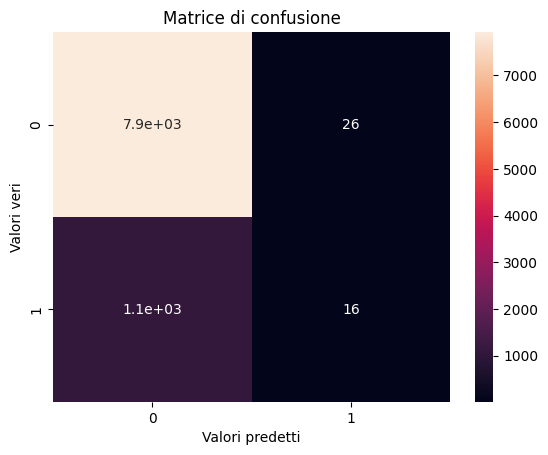

Accuracy:  0.8782483689041247
Precision:  0.8805688256860349
Recall:  0.9967303822937625


In [22]:
# ricreiamo il modello con il valore di k migliore
classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier.fit(X_train, y_train)

# prediciamo i valori
y_pred = classifier.predict(X_test)

# creiamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title('Matrice di confusione')
plt.xlabel('Valori predetti')
plt.ylabel('Valori veri')
plt.show()

# valutiamo l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# valutiamo la precisione
precision = precision_score(y_test, y_pred, pos_label='no')
print('Precision: ', precision)

# valutiamo il recall
recall = recall_score(y_test, y_pred, pos_label='no')
print('Recall: ', recall)
